# A simpler version

In [16]:
import torch
from spacyfuncs import get_docs
from transformers import logging, AutoTokenizer
logging.set_verbosity_error()
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased', use_fast=True)

docs = get_docs([],
                '../data/bookcorpus_0_5000.spacy',
                id_text_tuples=False,
               )

embeds = torch.load('../data/bookcorpus_embeddings_0_5000.pt')
bert_embeds = torch.load('../data/bert_lookup_embeddings.pt')

assert len(docs) == len(embeds)

Retrieving from existing Docbin file


0it [00:00, ?it/s]

In [26]:
def nearest_neighbor_lookup(lookup_embeds, test_vector, topk=3):
    dist = torch.norm(lookup_embeds - test_vector, dim=1, p=None)
    knn = dist.topk(topk, largest=False)
    dist_ind_pairs = [
        (tokenizer.decode([ind]), round(val.item(), 2))
        for val, ind in zip(*knn)
    ]
    
    return knn

In [155]:
topk = 5

x = list(range(topk))
y = []
z = []
text = []
# cols = range(topk)


for orig_tok_id, start, embed in embeds[0]:
    distances, tok_ids = nearest_neighbor_lookup(bert_embeds,
                                                 embed[12],
                                                 topk=topk)
    y.append(f'{tokenizer.decode([orig_tok_id])}')
    z.append(distances.numpy())
    text.append([tokenizer.decode([tok_id]) for tok_id in tok_ids])

In [42]:
docs[0]

usually , he would be tearing around the living room , playing with his toys .

In [167]:
y[11] = ', '

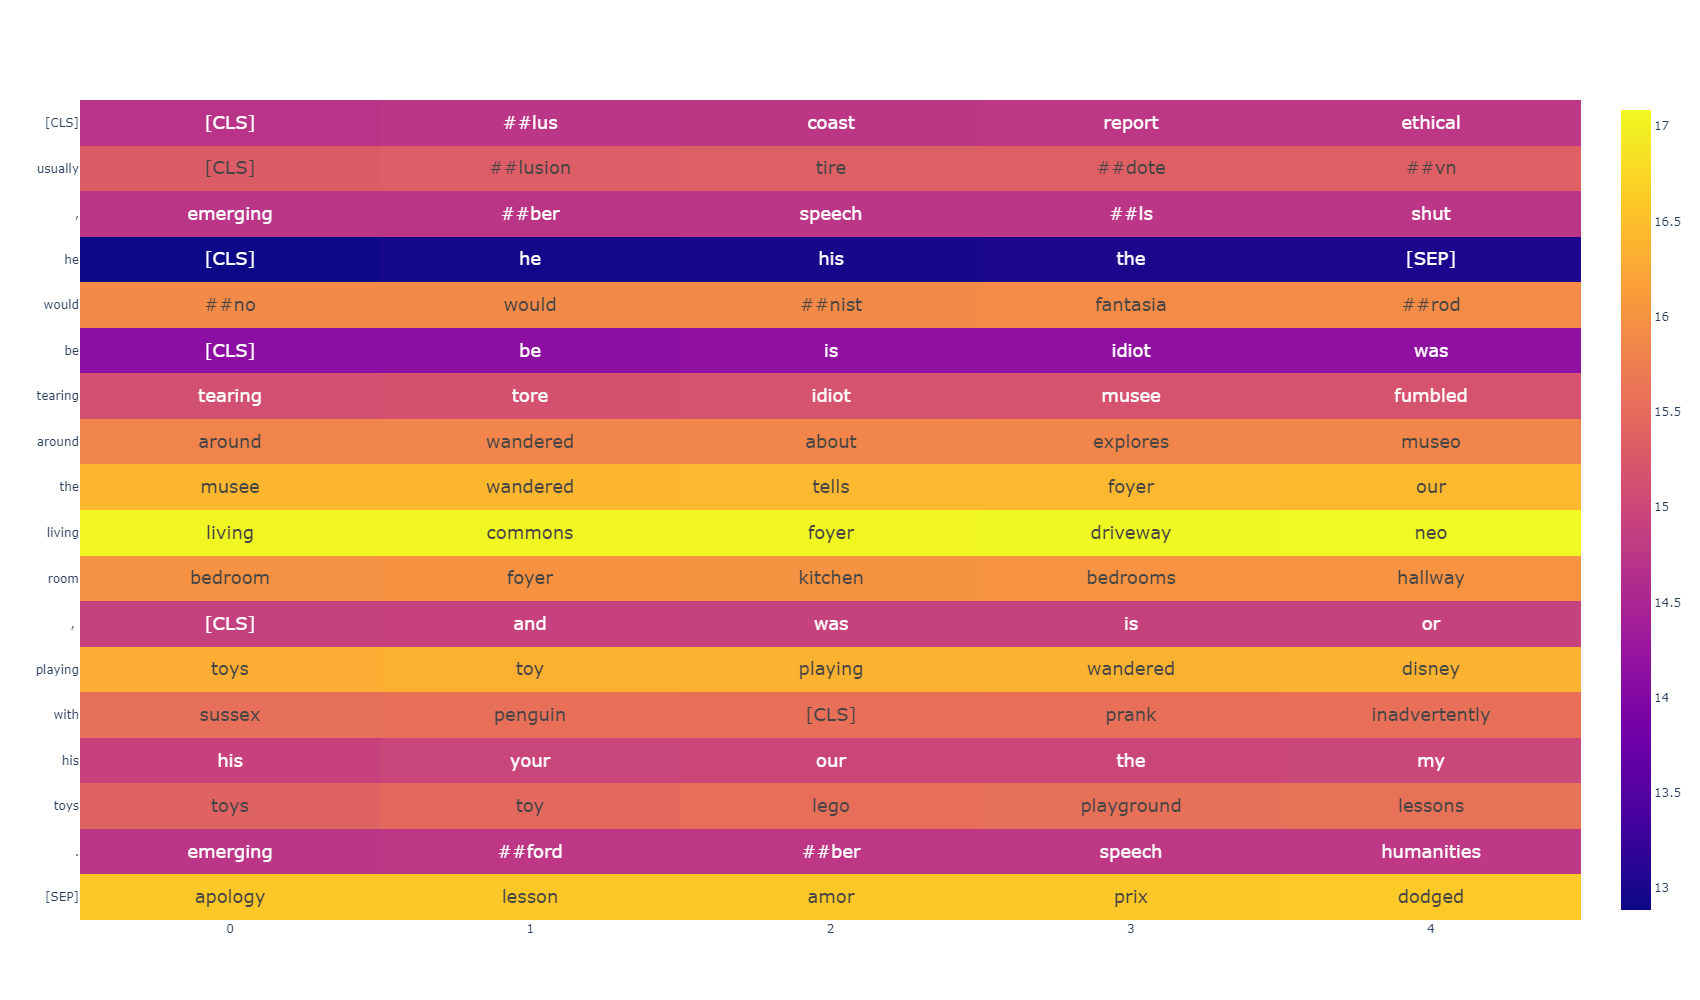

In [168]:
import plotly.graph_objects as go

fig = go.Figure(
    data=go.Heatmap(
        x=x,
        y=y,
        z=z,
        text=text,
        texttemplate="%{text}",
        textfont={"size":18},
    ), layout=go.Layout(height=1000))

fig.update_yaxes(autorange="reversed")

fig.show()